In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt


Import the dataset

In [5]:
df=pd.read_csv('assets/features_3_sec.csv')
df.shape

(9990, 60)

drop columns of no use

In [6]:
df=df.drop(labels='filename',axis=1)

Get list of all classes such as blues,classical etc from the last column of dataframe to label encode

In [7]:

class_list=df.iloc[:,-1]
convertor=LabelEncoder()

Label encoding the classes in the class_list

In [8]:
y=convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [9]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

Scales the features in the DataFrame df using the StandardScaler, excluding the last column (assumed to be the target variable), and stores the scaled features in the variable X.

In [10]:
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

Split data into the training and testing data

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [12]:
len(y_train)

6693

In [13]:
len(y_test)

3297

Train the CNN MODEL

In [14]:
def train_model(model,epochs,optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

DEFINING ALL THE LAYERS OF CNN MODEL

In [15]:
model = Sequential([
    Dense(512, activation="relu", input_shape=(X_train.shape[1], )),
    Dropout(0.2),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

print(model.summary())
model_history = train_model(model=model, epochs=600, optimizer="adam")


C:\Users\taruh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        30,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,338 (794.29 KB)

 Trainable params: 203,338 (794.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3077 - loss: 1.9240 - val_accuracy: 0.6075 - val_loss: 1.1451
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6008 - loss: 1.1849 - val_accuracy: 0.6779 - val_loss: 0.9061
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6787 - loss: 0.9370 - val_accuracy: 0.7213 - val_loss: 0.8048
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7198 - loss: 0.8260 - val_accuracy: 0.7486 - val_loss: 0.7196
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7630 - loss: 0.7097 - val_accuracy: 0.7804 - val_loss: 0.6480
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7908 - loss: 0.6296 - val_accuracy: 0.8022 - val_loss: 0.5680
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8090 - loss: 0.5670 - val_accuracy: 0.8113 - val_loss: 0.5568
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8145 - loss: 0.5341 - val_accuracy: 0.82

Evaluating the model

In [16]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("The test loss is :",test_loss)
print("The test accuracy is :",test_acc*100)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9032 - loss: 0.4897 
The test loss is : 0.4616783857345581
The test accuracy is : 90.53685069084167


PLOT FOR ACCURACY OF MODEL

In [17]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="train loss")
    axs[1].plot(history.history["val_loss"], label="test loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss eval")

    plt.show()


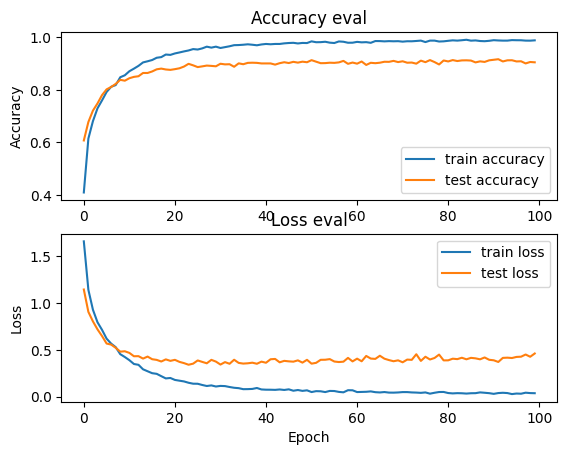

In [18]:
plot_history(model_history)

Other ML MODELS FOR TESTING ML VS DL

LOGISTIC REGRESSION

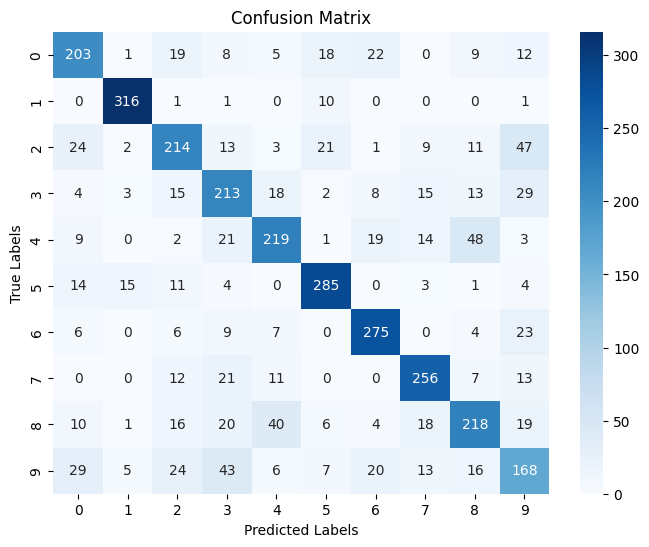

In [19]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_preds)


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, log_reg_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


SUPPORT VECTOR MACHINES

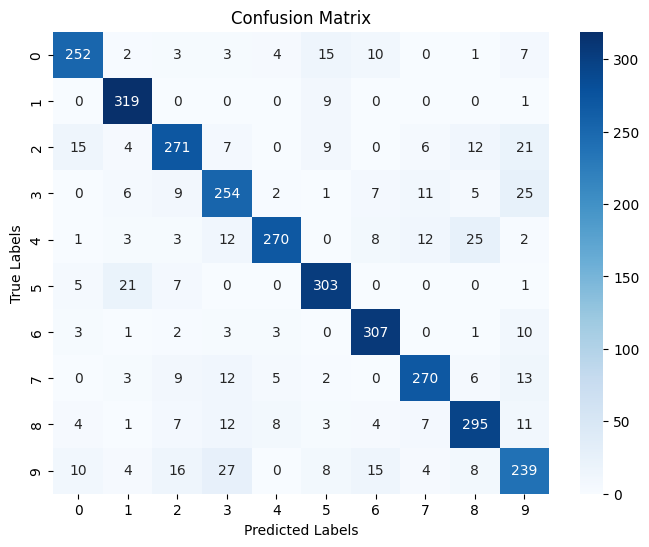

In [20]:
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, svm_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


RANDOM FOREST CLASSIFIER

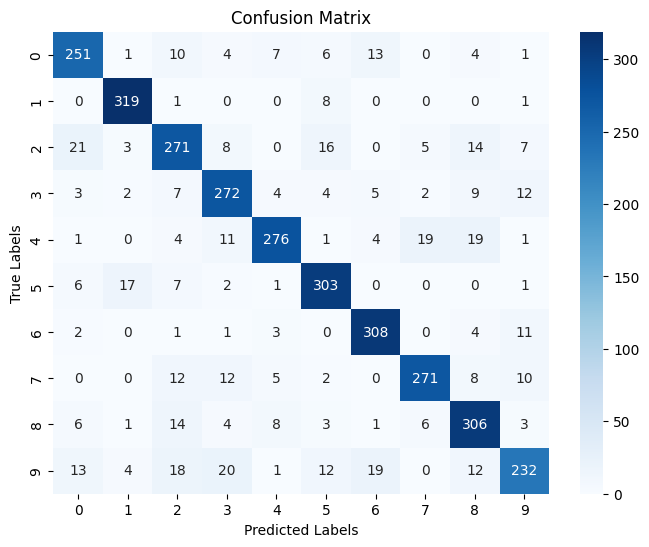

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, rf_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


GRADIENT BOOSTING

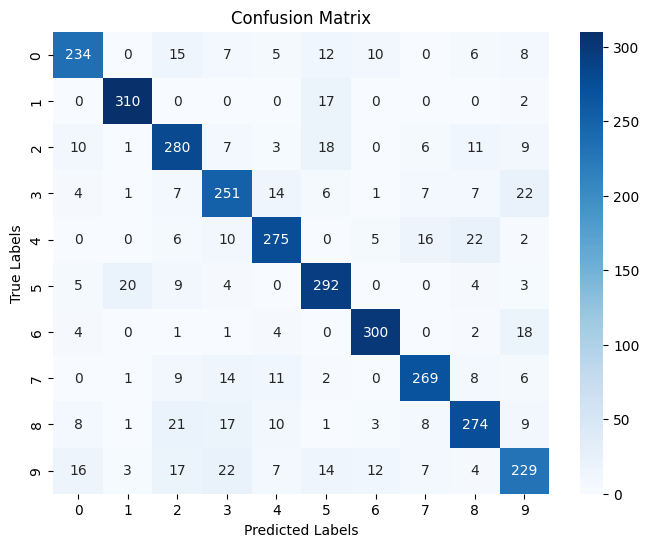

In [22]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_preds)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, gb_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print("Logistic Regression Accuracy:", log_reg_acc)
print("Support Vector Machine Accuracy:", svm_acc)
print("Random Forest Accuracy:", rf_acc)
print("Gradient Boosting Accuracy:", gb_acc)
print("Keras Model Accuracy:", test_acc)

Logistic Regression Accuracy: 0.7179253867151957
Support Vector Machine Accuracy: 0.843190779496512
Random Forest Accuracy: 0.8519866545344252
Gradient Boosting Accuracy: 0.8231725811343645
Keras Model Accuracy: 0.9053685069084167


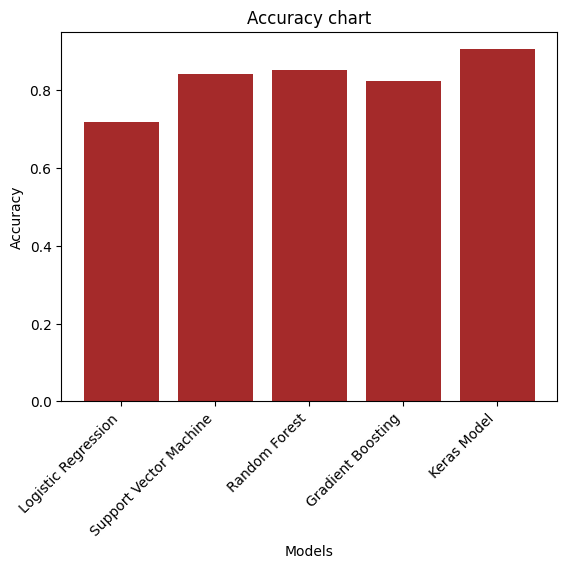

In [24]:
X_corr = ["Logistic Regression", "Support Vector Machine", "Random Forest", "Gradient Boosting", "Keras Model"]
Y_corr = [log_reg_acc, svm_acc, rf_acc, gb_acc, test_acc]

plt.bar(X_corr, Y_corr,color='brown')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Accuracy chart")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()


In [25]:
df1=pd.DataFrame({'Models':X_corr,'Accuracy':Y_corr}, index=range(1, len(X_corr) + 1))
df1.index.name='Sr No'
df_left = df1.style.set_properties(**{'text-align': 'left'})
# df_left.columns = pd.Index(['Name', 'Age', 'City'], name='Sr No')
df_left

,Models,Accuracy
Sr No,,
1,Logistic Regression,0.717925
2,Support Vector Machine,0.843191
3,Random Forest,0.851987
4,Gradient Boosting,0.823173
5,Keras Model,0.905369
